# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса. 

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)
# print(regression.loss_history, max_iter)
assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/70588/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/70588/run-report/125506211/


* **StochasticDescent**: https://contest.yandex.ru/contest/70588/run-report/125505818/


* **MomentumDescent**: https://contest.yandex.ru/contest/70588/run-report/125505935/


* **Adam**: https://contest.yandex.ru/contest/70588/run-report/126891785/


* **LinearRegression**: https://contest.yandex.ru/contest/70588/run-report/126891785/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [7]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [8]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

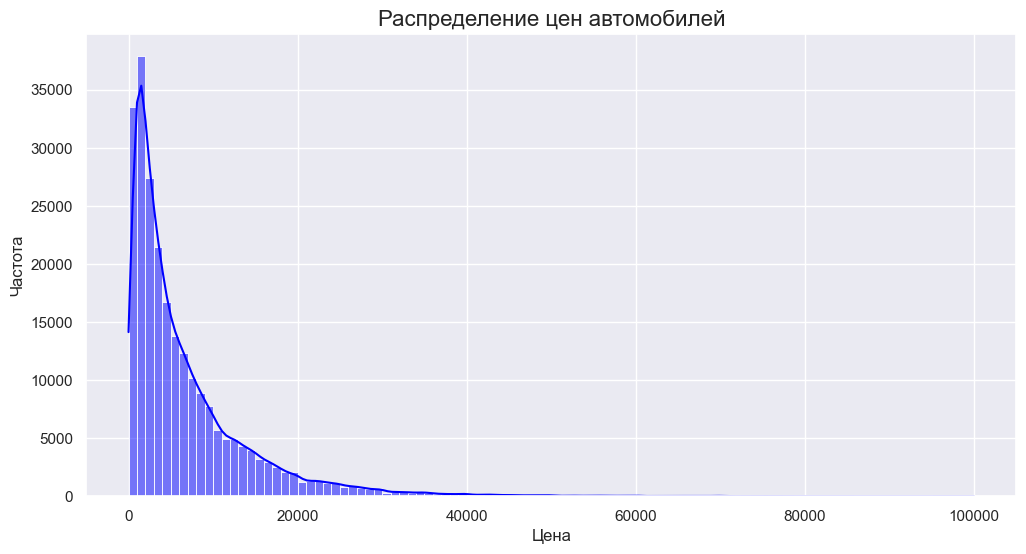

count    241190.000000
mean       6887.741892
std        8024.451993
min           1.000000
25%        1750.000000
50%        4100.000000
75%        8999.000000
max       99999.000000
Name: price, dtype: float64

In [9]:

plt.figure(figsize=(12, 6))
sns.histplot(data['price'], bins=100, kde=True, color='blue')
plt.title('Распределение цен автомобилей', fontsize=16)
plt.xlabel('Цена', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.show()

price_stats = data['price'].describe()

price_stats

Заменим таргет - цену на её логарифм

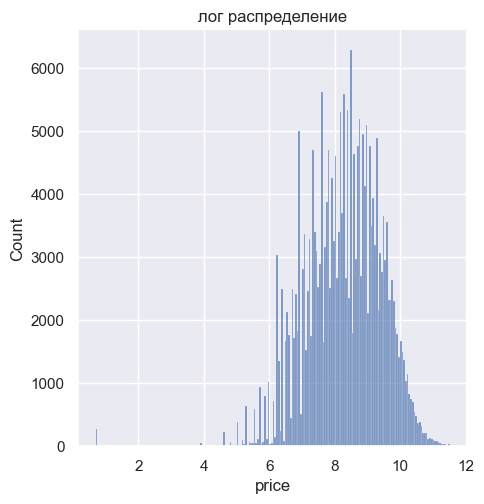

In [10]:
sns.displot(np.log1p(data['price'])).set(title='лог распределение')
data['log_price'] = np.log1p(data['price'])

In [11]:
# data.describe()

Немного изменим данные, отфильтровав их по цене, где существуют явные выбросы.

In [12]:
data = data[(data['price'] >= 100) & (data['price'] <= 50000)]
data.describe()

,powerPS,kilometer,autoAgeMonths,price,log_price
count,239846.000000,239846.000000,239846.000000,239846.000000,239846.000000
mean,130.552967,123999.066067,144.826484,6683.255531,8.267299
std,59.099033,39593.499087,72.717107,7173.049149,1.107839
min,51.000000,5000.000000,1.000000,100.000000,4.615121
25%,90.000000,100000.000000,92.000000,1750.000000,7.467942
50%,118.000000,150000.000000,140.000000,4100.000000,8.318986
75%,160.000000,150000.000000,192.000000,8950.000000,9.099521
max,589.000000,150000.000000,600.000000,50000.000000,10.819798


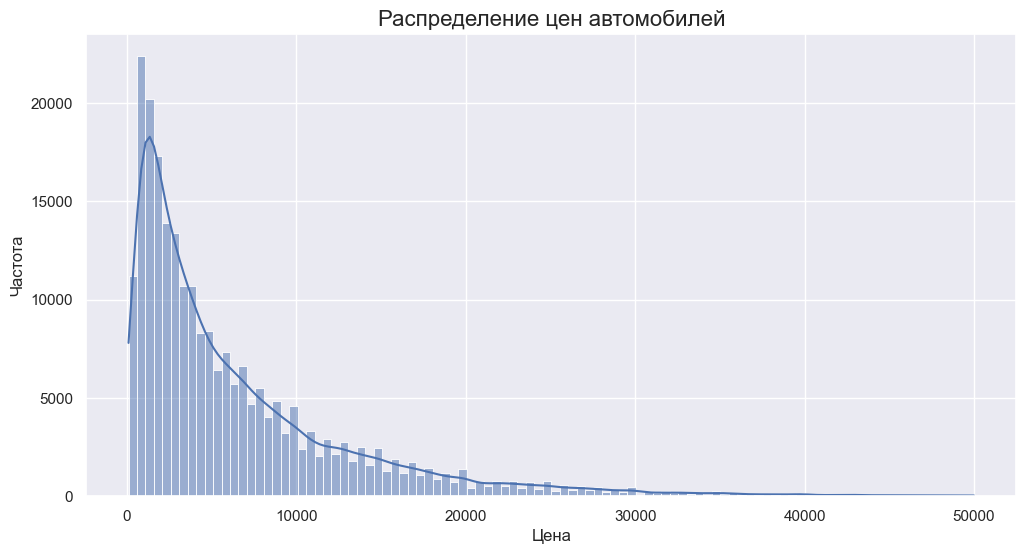

count    239846.000000
mean       6683.255531
std        7173.049149
min         100.000000
25%        1750.000000
50%        4100.000000
75%        8950.000000
max       50000.000000
Name: price, dtype: float64

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(data['price'], bins=100, kde=True)
plt.title('Распределение цен автомобилей', fontsize=16)
plt.xlabel('Цена', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.show()

price_stats = data['price'].describe()

price_stats

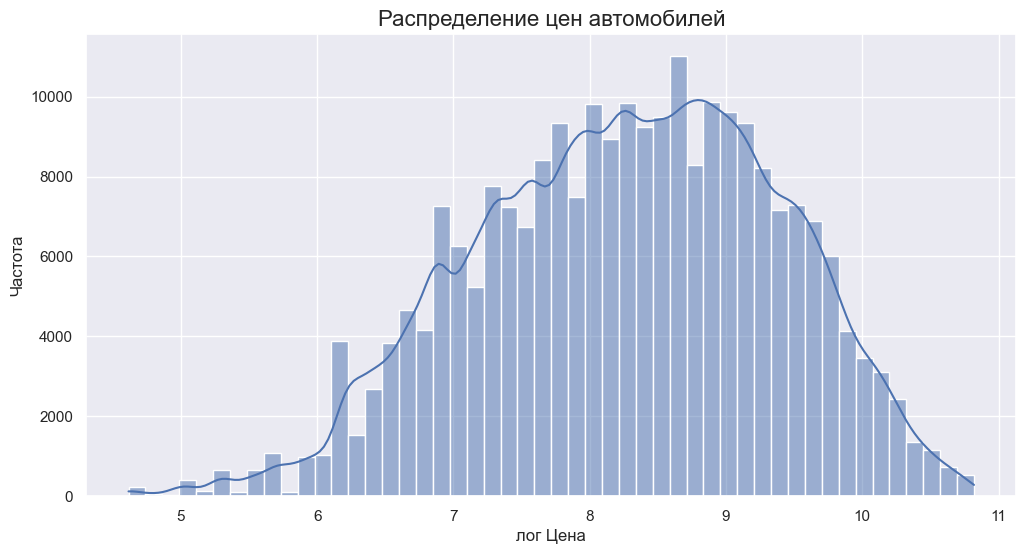

count    239846.000000
mean       6683.255531
std        7173.049149
min         100.000000
25%        1750.000000
50%        4100.000000
75%        8950.000000
max       50000.000000
Name: price, dtype: float64

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(data['log_price'], bins=50, kde=True)
plt.title('Распределение цен автомобилей', fontsize=16)
plt.xlabel('лог Цена', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.show()

price_stats_log = data['log_price'].describe()

price_stats

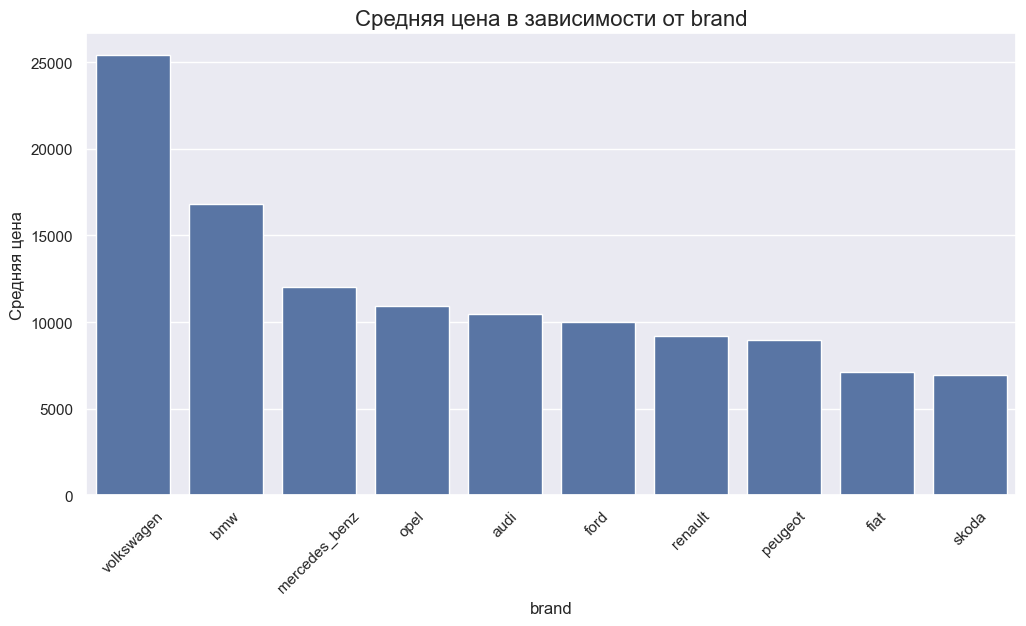

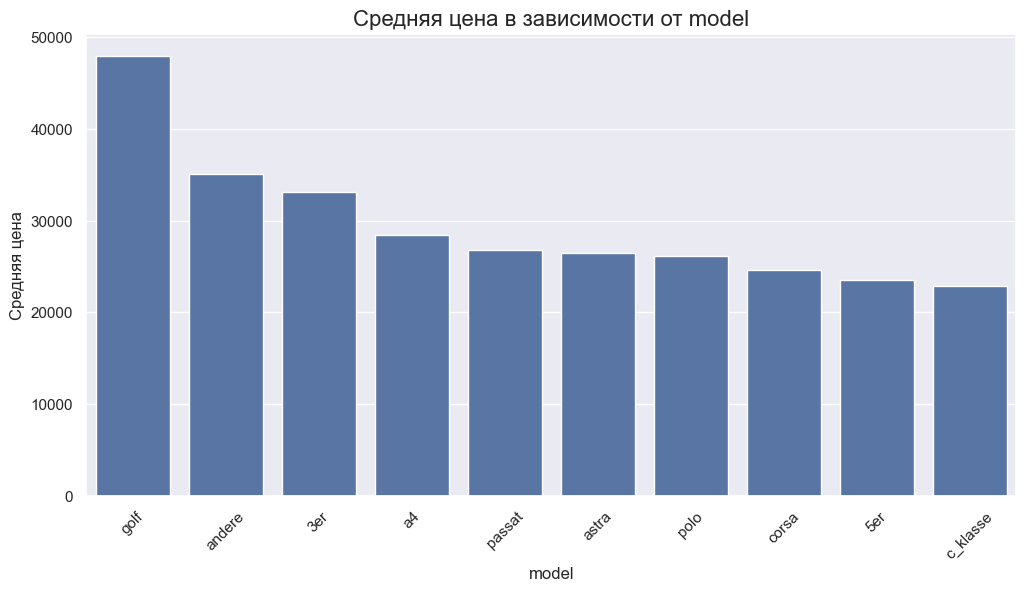

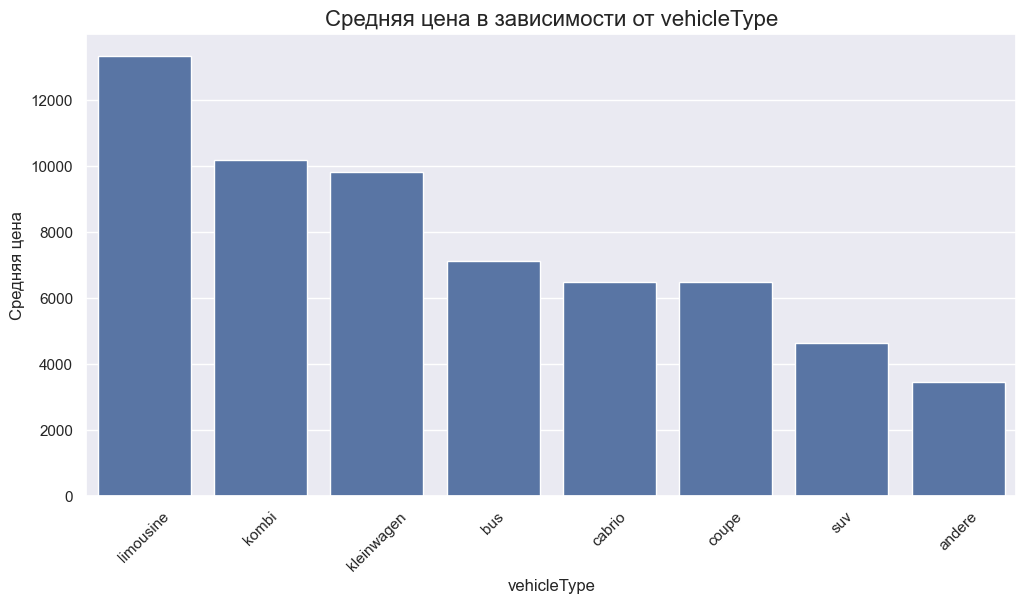

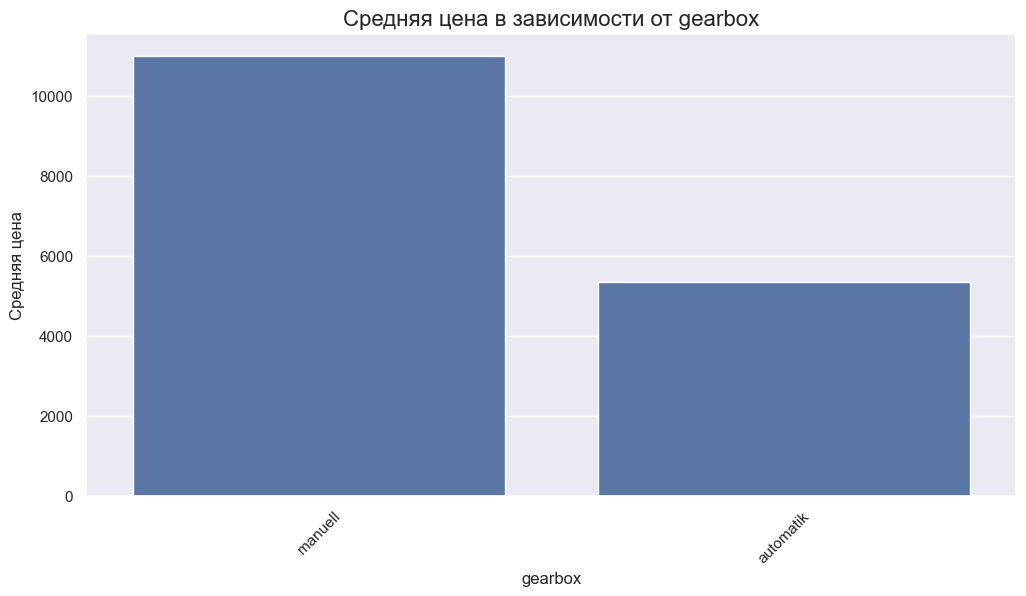

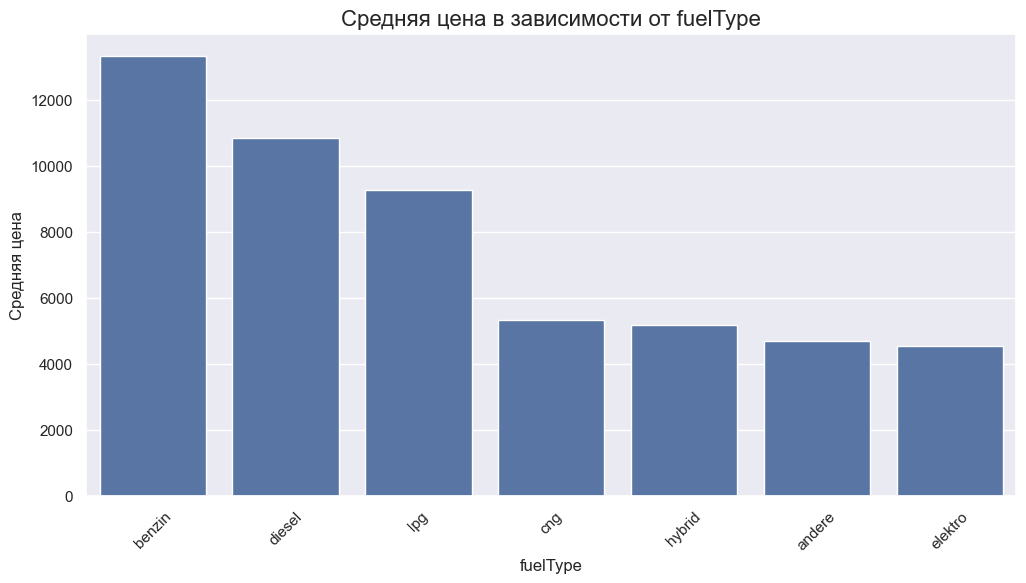

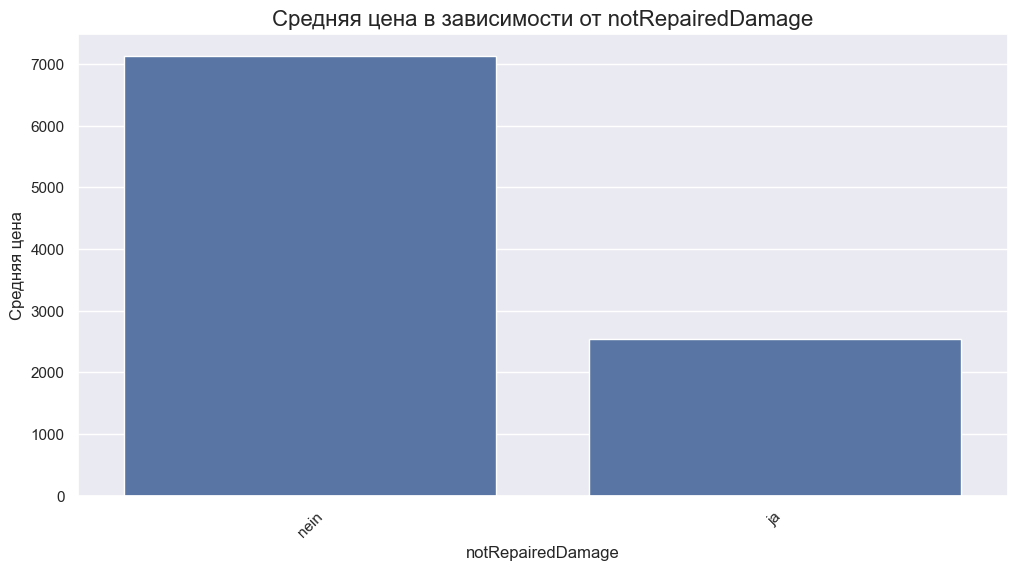

In [15]:
for feature in ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']:
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=data[feature].value_counts().index[:10], 
        y=data.groupby(feature)['price'].mean().sort_values(ascending=False)[:10].values
    )
    plt.title(f'Средняя цена в зависимости от {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Средняя цена', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

Text(0.5, 1.0, 'каждый бред с логарифмом цены')

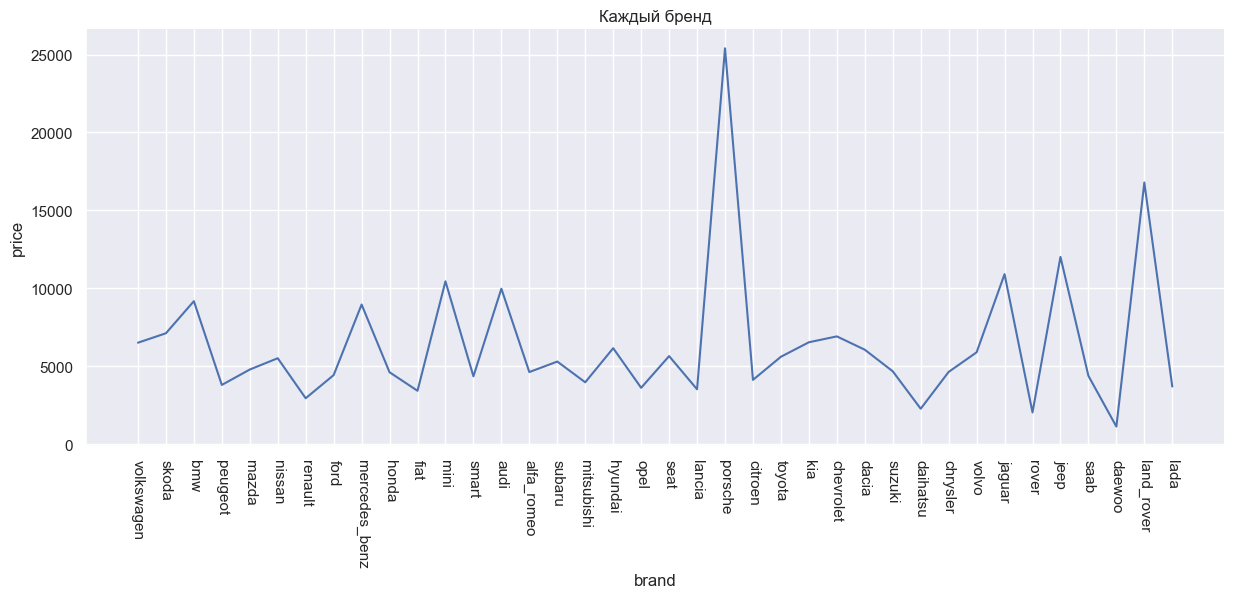

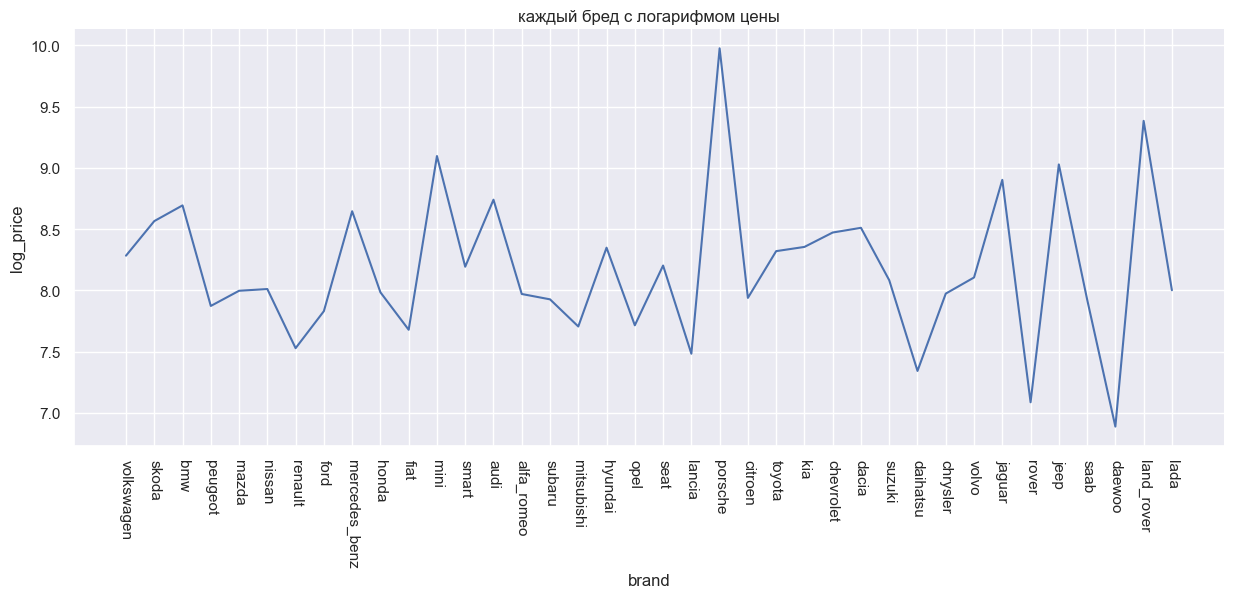

In [16]:
sns.relplot(x=data['brand'], y=data['price'], kind='line', aspect=2.5, errorbar=None)
plt.xticks(rotation=270)
plt.title('Каждый бренд')

sns.relplot(x=data['brand'], y=data['log_price'], kind='line', aspect=2.5, errorbar=None)
plt.xticks(rotation=270)
plt.title('каждый бред с логарифмом цены')



чтобы эффективно использовать этот признак не нужно использовать прямой индикатор, можно просто взять какие-то машины, которые отличаются от других (более бюджетных) по цене. Выберу 5 из них

In [17]:
data['is_premium'] = data['brand'].isin(['porsche', 'land_rover', 'mini', 'jeep', 'jaguar']).astype('int64')
data.head(-20) # поршик видно

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price,is_premium
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500,7.313887,0
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600,8.188967,0
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650,6.478510,0
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200,7.696667,0
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000,7.601402,0
...,...,...,...,...,...,...,...,...,...,...,...,...
241165,smart,roadster,cabrio,automatik,benzin,nein,82,125000,121,4499,8.411833,0
241166,porsche,andere,cabrio,manuell,benzin,nein,211,150000,297,12800,9.457279,1
241167,mercedes_benz,e_klasse,limousine,automatik,diesel,nein,136,60000,48,20500,9.928229,0
241168,mercedes_benz,e_klasse,limousine,automatik,diesel,ja,177,150000,167,3800,8.243019,0


1) По первому графику видно, что некоторые бренды стоят в среднем дороже (Например volkswagen, bmw и marcedes) 
2) Модель также отличается по цене, например в среднем гольф дороже остальных машин минимум на 10тыс. Но это форма машины ну или типо того и как это можно использовать для признака пока не очень понял, потом если что придумаю, но пока просто уберу его.
3) Типы автомобиля так же решает(правда удивительно, что у кабриолета такая цена). В топе лимузинный тип. 
Но если посмотреть, сколько таих вот типов, то увидим, что их не много, так что пойдёт и OHS. потом просто для всех таких значений функцию применим.

In [18]:
data['is_automatik'] = (data['gearbox'] != 'manuell').astype('int64')

In [19]:
len(data['fuelType'].unique())

7


4) Автоматическая коробка передач у машины означает повышенную цену, относительно механики. Собстевнно тут тоже можно использовать OHS, но мы можем немного схитрить и написать один столбец, так как ответ либо механика, либо нет.
5) В основном в более дорогом секторе машин использую бензинное и дизельное топливо. Тут всего-то типов топлива 8 штук. так что хот энкодинг пойдёт.
6) Очевидно, что машина без повреждений дороже храмой тачки. Тут использую тот же метод что и с механикой - немеханикой

In [20]:
data['is_good'] = (data['notRepairedDamage'] ==  'nein').astype('int64')


In [21]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price,is_premium,is_automatik,is_good
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500,7.313887,0,0,1
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600,8.188967,0,0,1
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650,6.478510,0,0,0
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200,7.696667,0,0,1
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000,7.601402,0,0,1


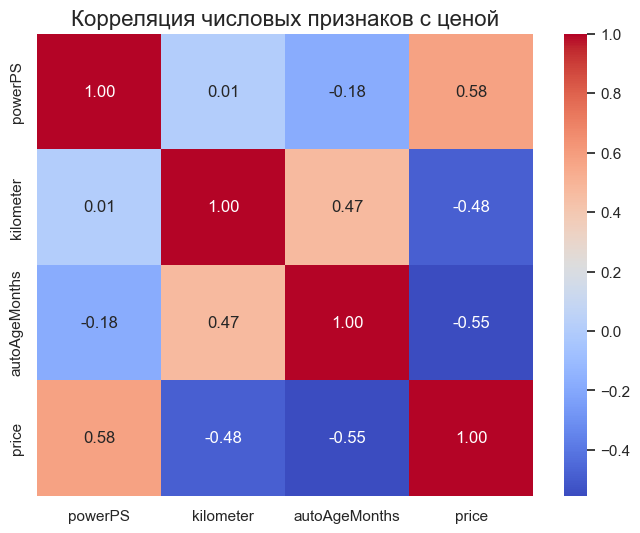

price            1.000000
powerPS          0.577130
kilometer       -0.483229
autoAgeMonths   -0.554318
Name: price, dtype: float64

In [22]:
correlation_matrix = data[['powerPS','kilometer', 'autoAgeMonths', 'price']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция числовых признаков с ценой', fontsize=16)
plt.show()

correlation_matrix['price'].sort_values(ascending=False)

Вот тут кстати по интересней, тут видна корреляция цены с мощность. Это говорит о том, что мощные авто, как правило, стоят дороже.

Ну это всё хорошо, тока у нас же определенно есть какие-то выбросы, надо проверить.


Text(0.5, 1.0, 'Распределение мощностей')

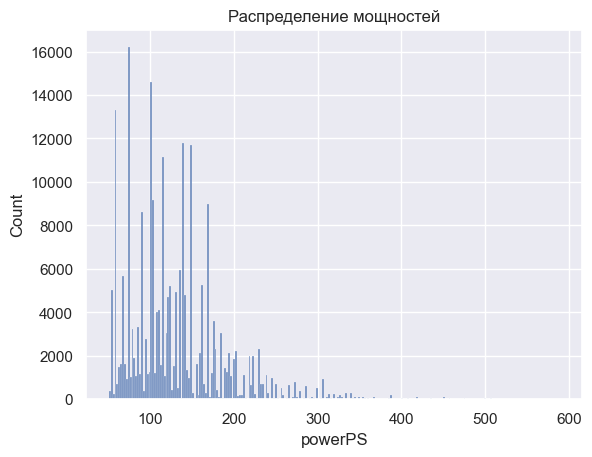

In [23]:
sns.histplot(data['powerPS'])
plt.title('Распределение мощностей')

Вот кстати и они, сразу надо от низ избавиться

In [24]:

data.drop(data[data['powerPS'] > data['powerPS'].quantile(0.98)].index, axis=0, inplace=True)


Text(0.5, 1.0, 'Распределение мощностей')

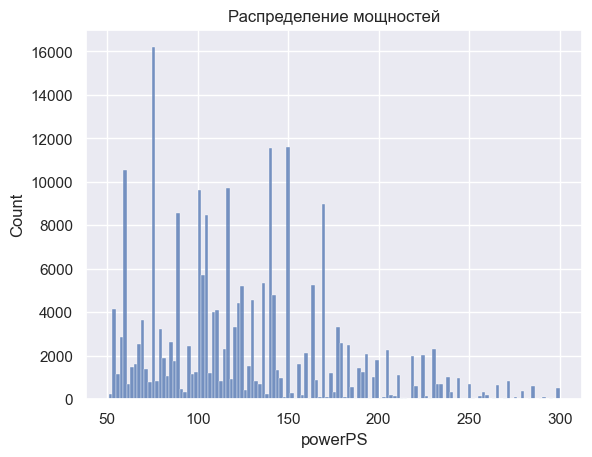

In [25]:
sns.histplot(data['powerPS'])
plt.title('Распределение мощностей')

Вот выбрасов справо стало меньше, сразу дышать легче

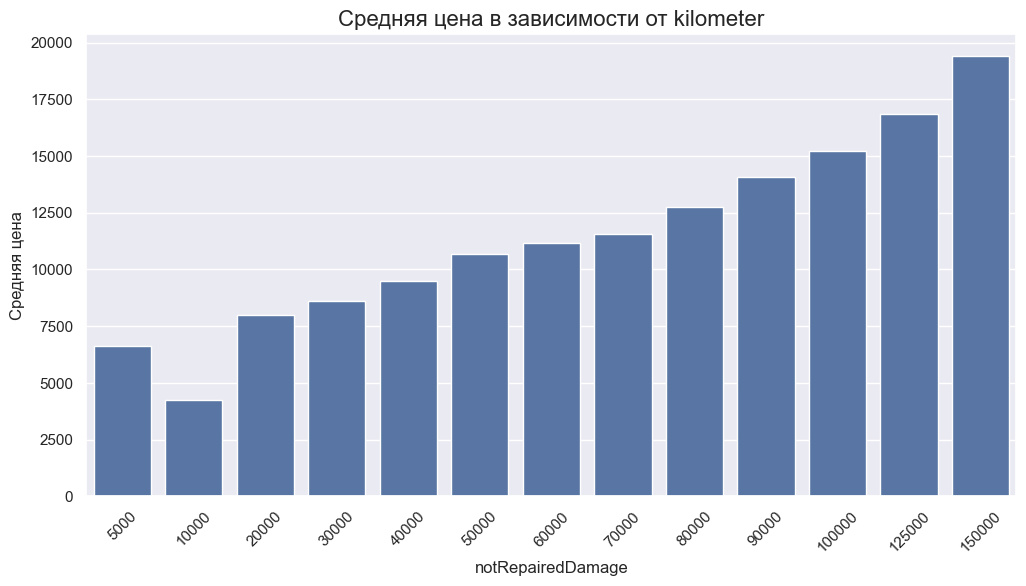

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=data["kilometer"].value_counts().index, 
    y=data.groupby("kilometer")['price'].mean().sort_values(ascending=False).values
)
plt.title(f'Средняя цена в зависимости от {'kilometer'}', fontsize=16)
plt.xlabel(feature, fontsize=12)
plt.ylabel('Средняя цена', fontsize=12)
plt.xticks(rotation=45)
plt.show()


Тут сразу бросается в глаза первый столбик, щас его делитнем

In [27]:
data.drop((data[data['kilometer'] == 5000]).index, axis=0, inplace=True)

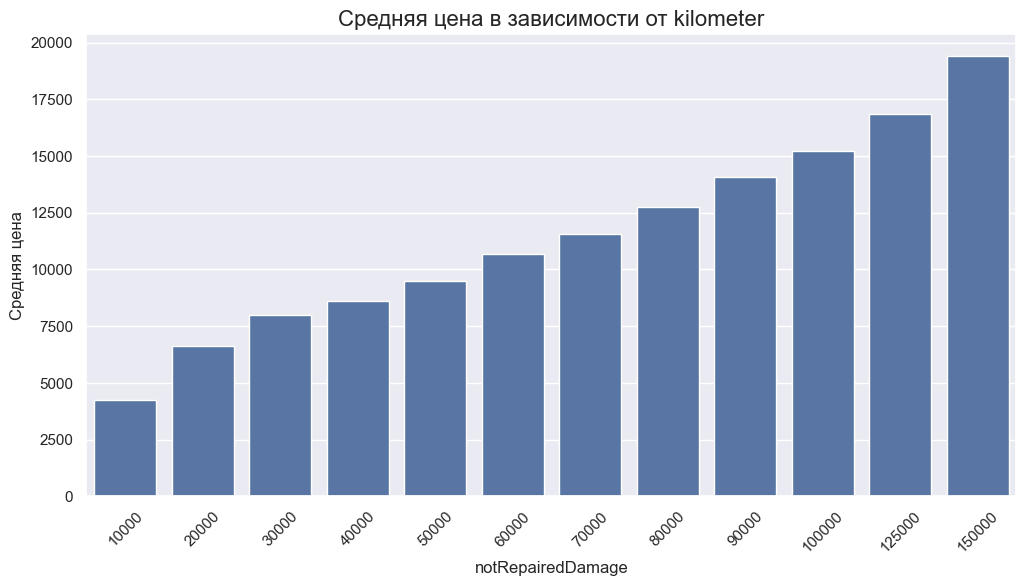

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=data["kilometer"].value_counts().index, 
    y=data.groupby("kilometer")['price'].mean().sort_values(ascending=False).values
)
plt.title(f'Средняя цена в зависимости от {'kilometer'}', fontsize=16)
plt.xlabel(feature, fontsize=12)
plt.ylabel('Средняя цена', fontsize=12)
plt.xticks(rotation=45)
plt.show()


Вот теперь линейно

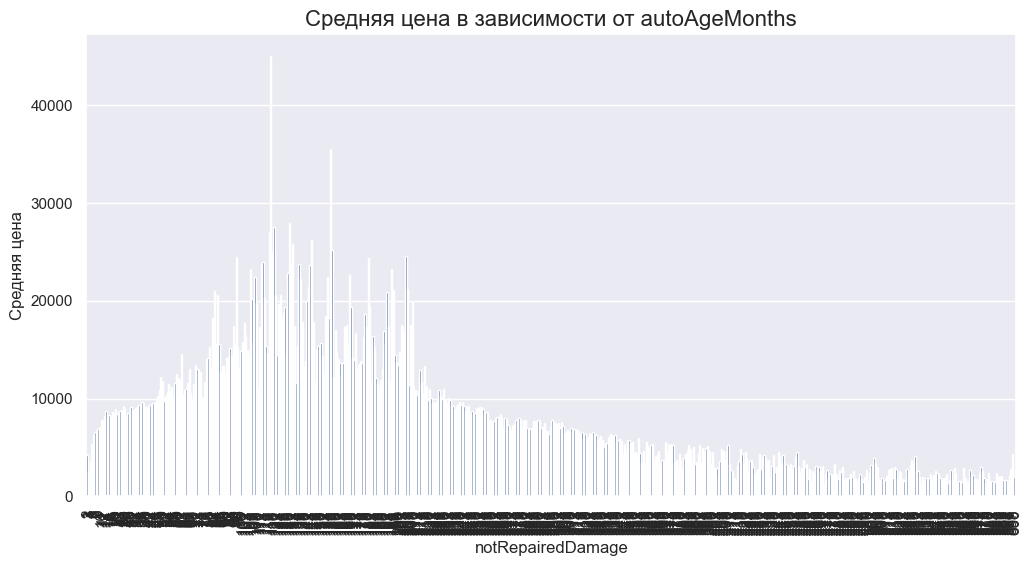

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=data["autoAgeMonths"].value_counts().index, 
    y=data.groupby("autoAgeMonths")['price'].mean().sort_values(ascending=False).values
)
plt.title(f'Средняя цена в зависимости от {'autoAgeMonths'}', fontsize=16)
plt.xlabel(feature, fontsize=12)
plt.ylabel('Средняя цена', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Ничё не видно, придется линию рисовать

Text(0.5, 1.0, 'Возраст авто vs цена')

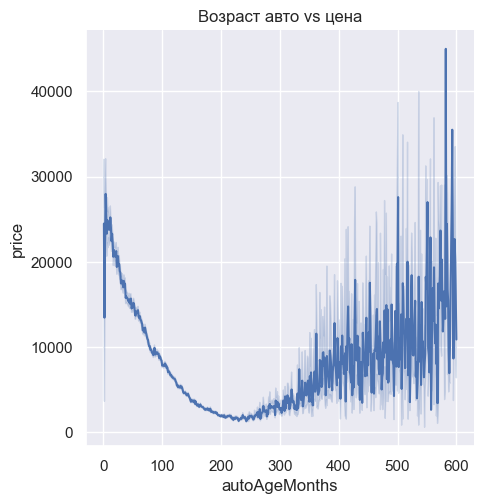

In [30]:
sns.relplot(x=data['autoAgeMonths'],y=data['price'],kind='line')
plt.title('Возраст авто vs цена')

Какой-то странный тайфун. Но по распределению из первой гистограммы видно, что после каких-то значений не очень много остаётся в каунте, можно предположить,что с какого-то момента начинается выброс. По линии можно понять, что выброс начинается где-то в промежутке [200,300]


In [31]:
print(data['autoAgeMonths'].count())
data[data['autoAgeMonths'] > 230].count() # 10 %
data[data['autoAgeMonths'] > 260].count() # 5 %
data[data['autoAgeMonths'] > 300].count() # 2.5 %

233680


brand                5331
model                5331
vehicleType          5331
gearbox              5331
fuelType             5331
notRepairedDamage    5331
powerPS              5331
kilometer            5331
autoAgeMonths        5331
price                5331
log_price            5331
is_premium           5331
is_automatik         5331
is_good              5331
dtype: int64

значит можно удалить примрно начиная с 260.


In [32]:
data.drop((data[(data['autoAgeMonths'] > 260)]).index, axis=0, inplace=True)

Text(0.5, 1.0, 'Возраст авто vs цена')

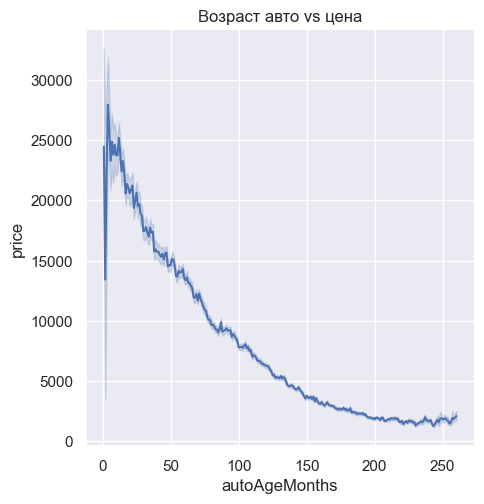

In [33]:
sns.relplot(x=data['autoAgeMonths'],y=data['price'],kind='line')
plt.title('Возраст авто vs цена')

ГУУУУУУД. Закончили с этим.

In [34]:
categorical = ['vehicleType', 'fuelType']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = ['is_premium', 'is_automatik', 'is_good']


data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price'].to_numpy()

In [35]:
print(x.shape )
x.head()


(221824, 9)


,vehicleType,fuelType,powerPS,kilometer,autoAgeMonths,is_premium,is_automatik,is_good,bias
0,kleinwagen,benzin,75,150000,177,0,0,1,1
1,kleinwagen,diesel,69,90000,93,0,0,1,1
2,limousine,benzin,102,150000,246,0,0,0,1
3,cabrio,benzin,109,150000,140,0,0,1,1
4,limousine,benzin,105,150000,136,0,0,1,1


In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)


для работы с датасетом мы преобразовали категориальные признаки в индикаторы

In [ ]:
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler




X_train, X_tmp, Y_train, Y_tmp = train_test_split(x, y, test_size=0.2, random_state=228)
X_val, X_test, Y_val, Y_test = train_test_split(X_tmp, Y_tmp, test_size=0.5, random_state=228)
X_train.shape, X_val.shape, X_test.shape

((177459, 22), (22182, 22), (22183, 22))

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [103]:
import numpy as np

learning_rates = np.logspace(-5, 1, 11)

best_lambdas = {'full': 100, 'stochastic': 100, 'momentum': 100, 'adam': 100}
best_mse = {'full': 10000000, 'stochastic': 10000000, 'momentum': 10000000, 'adam': 10000000}

for method in best_lambdas.keys():
    for lambda_ in learning_rates:
        reg = LinearRegression(descent_config={
            'descent_name': method,
            'kwargs': {'dimension': X_val.shape[1], 'lambda_': lambda_}
        })

        reg.fit(X_val, Y_val)

        pred = reg.predict(X_val)

        mse = reg.descent.calc_loss(X_val, Y_val)

        if mse < best_mse[method]:
            best_mse[method] = mse
            best_lambdas[method] = lambda_

print("Лучшие значения lambda для каждого метода:")
for method, lambda_ in best_lambdas.items():
    print(f"Метод: {method}, Лучшая lambda: {lambda_}, MSE: {best_mse[method]}")

dataset = pd.DataFrame(index=['best_lambda', 'mse_test', 'mse_train', 'r2_score', 'num_iterations'],
                     columns=['full', 'stochastic', 'momentum', 'adam'])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\User\Кирилл\МО\descents.py:77: RuntimeWarning: overflow encountered in square
  loss = np.mean((x@(self.w) - y)**2)


Лучшие значения lambda для каждого метода:
Метод: full, Лучшая lambda: 2.511886431509577, MSE: 0.21999435788103525
Метод: stochastic, Лучшая lambda: 0.630957344480193, MSE: 0.26433836235890995
Метод: momentum, Лучшая lambda: 0.630957344480193, MSE: 0.21922360293558762
Метод: adam, Лучшая lambda: 10.0, MSE: 0.2180108346002114


In [104]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [105]:
num_iterations = {method: 0 for method in ['full', 'stochastic', 'momentum', 'adam']}

for method in num_iterations.keys():
    reg = LinearRegression(descent_config={
        'descent_name': method,
        'kwargs': {'dimension': X_train.shape[1], 'lambda_': best_lambdas[method]}
    })
    reg.fit(X_train, Y_train)
    y_pred_train = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    num_iterations[method] = reg.descent.lr.iteration
    dataset.loc['best_lambda', method] = best_lambdas[method]
    dataset.loc['mse_train', method] = mean_squared_error(y_pred_train, Y_train)
    dataset.loc['mse_test', method] = mean_squared_error(y_pred_test, Y_test)
    dataset.loc['r2_score', method] = r2_score(y_pred_test, Y_test)
    dataset.loc['num_iterations', method] = num_iterations[method]


In [106]:
dataset

,full,stochastic,momentum,adam
best_lambda,2.511886,0.630957,0.630957,10.0
mse_test,0.220246,0.283154,0.230362,0.221989
mse_train,0.213761,0.2761,0.223979,0.216356
r2_score,0.771975,0.744642,0.751309,0.761671
num_iterations,103,166,89,108


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

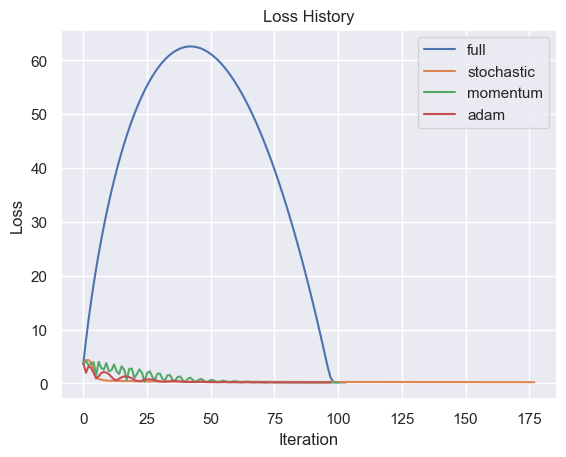

In [ ]:
for method in num_iterations.keys():
    reg = LinearRegression(
        descent_config={
            'descent_name': method,
            'kwargs': {'dimension': X_train.shape[1], 'lambda_': best_lambdas[method]}
        }
    )
    reg.fit(X_train, Y_train)
    plt.plot(np.log1p(reg.loss_history), label=method)

plt.legend()
plt.title('Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

Судя по таблицам метрик, метод adam демонстрирует наименьшую ошибку как на обучающей, так и на тестовой выборках. Кроме того, его 
𝑅2
  также является лучшим. Однако различия между методами небольшие — все четыре алгоритма показывают схожие результаты.

На графике можно заметить, что метод full имеет необычную траекторию изменения ошибки: в отличие от остальных методов, его ошибка сначала изменяется прыжком, но затем стабилизируется. Остальные три метода (adam, momentum, stochastic) снижают ошибку более плавно, хотя с некоторыми скачками. Тем не менее, в конечном итоге все методы достигают почти одинакового уровня ошибки.

При этом метод full завершает оптимизацию за третее минимальное количество итераций, перед ним следуют adam и momentum. stochastic требует наибольшего количества итераций, что делает его более затратным с точки зрения вычислительных ресурсов. Аж 145 итераций, довольно много.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [ ]:
import time

batch_sizes = np.arange(5, 500, 10)

iterations = {}
times = {}

for batch_size in batch_sizes:
    tmp_iter = []
    tmp_time = []

    for _ in range(10):
        reg = LinearRegression(descent_config={
            'descent_name': 'stochastic',
            'kwargs': {
                'dimension': X_train.shape[1],
                'lambda_': best_lambdas['stochastic'],
                'batch_size': batch_size
            }
        })
        start = time.time()
        reg.fit(X_train, Y_train)
        finish = time.time()
        tmp_time.append(finish - start)
        tmp_iter.append(reg.descent.lr.iteration)

    times[batch_size] = np.mean(tmp_time)
    iterations[batch_size] = np.mean(tmp_iter)
    


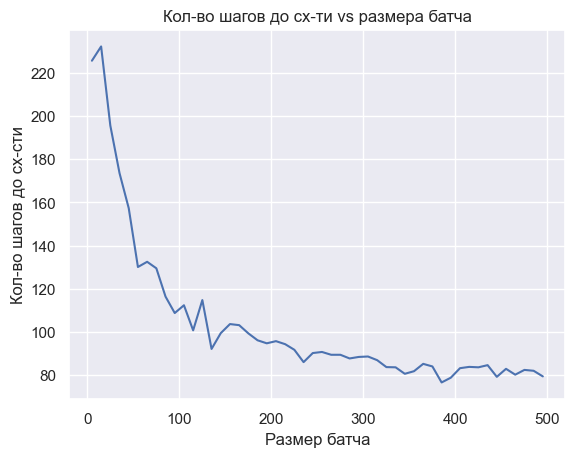

Text(0, 0.5, 'Время сходимости')

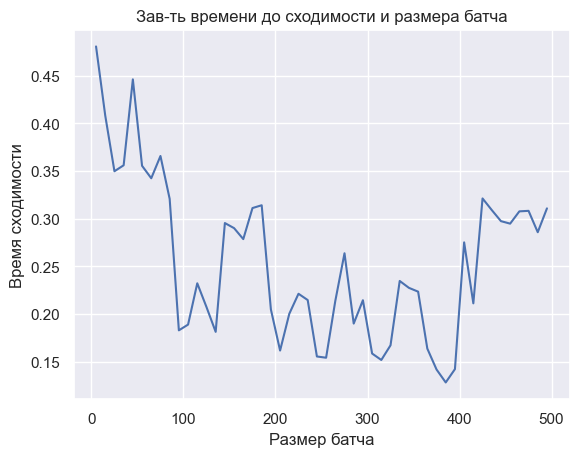

In [ ]:
sns.lineplot(x=list(iterations.keys()), y=list(iterations.values()))
plt.title('Кол-во шагов сх-ти vs размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Кол-во шагов сх-сти')


plt.show()

sns.lineplot(x=times.keys(), y=times.values())
plt.title('Зав-ть времени сх-ти и размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Время сходимости')


Из графиков видно, что увеличение размера батча приводит к уменьшению количества итераций и времени, необходимого для выполнения градиентного спуска. Это объясняется тем, что больший батч охватывает больше данных, что позволяет модели делать более точные шаги к минимуму. В результате процесс оптимизации требует меньше шагов и занимает меньше времени.

На первом графике видно, что с увеличением размера батча количество шагов до сходимости значительно уменьшается, но этот эффект замедляется на больших батчах (около 400–500). Это говорит о том, что после определённого размера батча прирост эффективности становится менее заметным.

На втором графике видно, что время до сходимости также уменьшается с увеличением размера батча, но неравномерно. Это может быть связано с тем, что на малых батчах расчёты требуют больше итераций, несмотря на меньший объём вычислений за шаг, а на больших батчах выигрыш от уменьшения итераций становится более значительным.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [44]:
# YOUR CODE:

`### ваше решение тут ###`

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [45]:
# YOUR CODE:

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

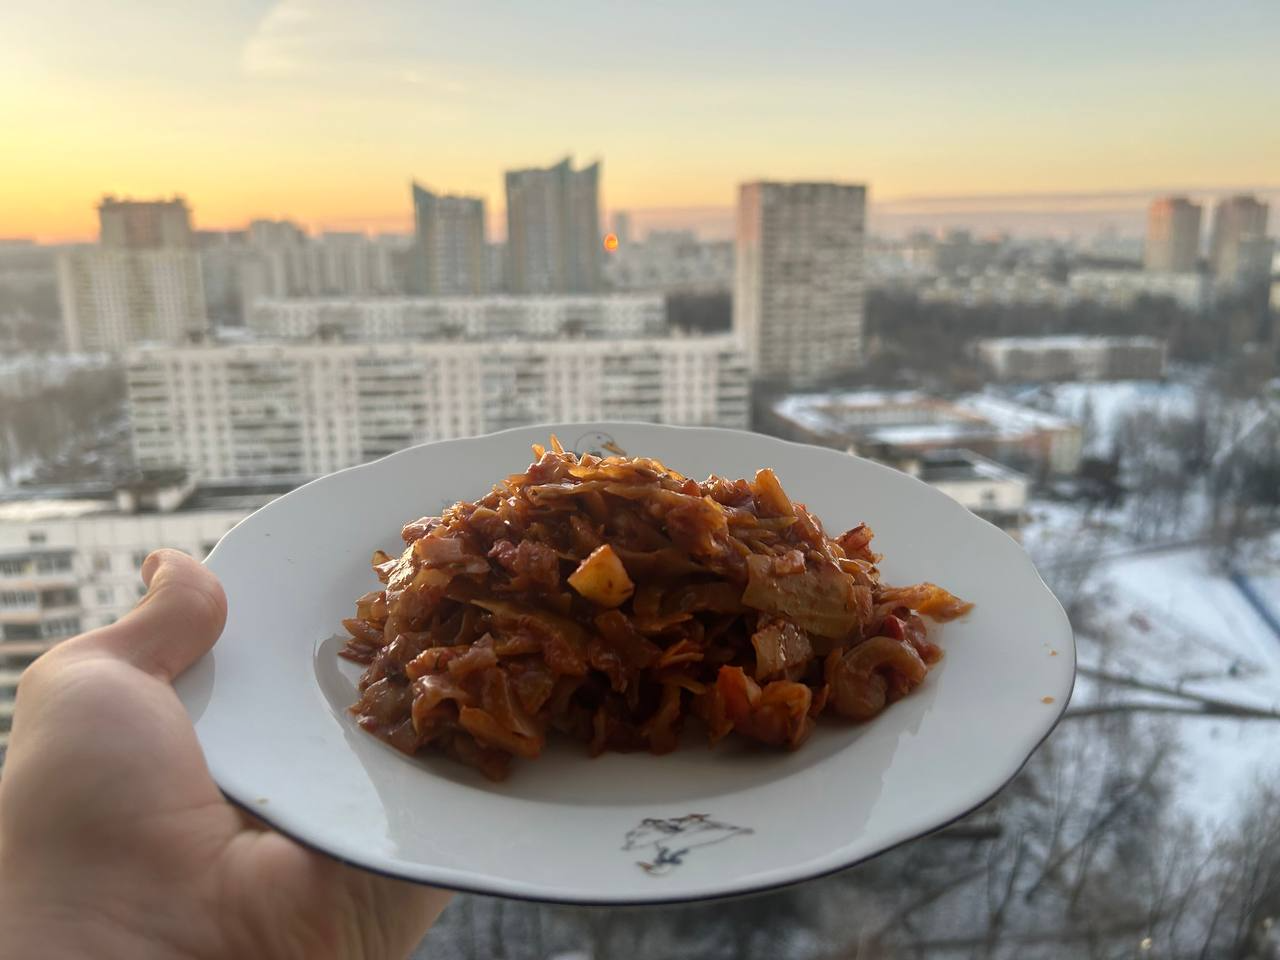

Приготовил Отцу капусты с курицей. Очень долго мял руками эту капусту, чтобы она получилась такая мягкая. По итогу, великий бог соли подвёл, есть был трудновато, но папа все равно всё съел, ну хоть курица мягенькая получилась. Очень досадно было ошибиться, но на ошибках мы учимся, двигаемся дальше.

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [46]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [47]:
# YOUR CODE: